# 1- Import Libraries

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# 2- Load and Read Data

In [2]:
trainFilesPath = 'airplane_dataset/train/'
testFilesPath = 'airplane_dataset/test/'

img = load_img(testFilesPath + 'type-13/13-11.jpg')

In [3]:
print(img_to_array(img).shape)

(188, 216, 3)


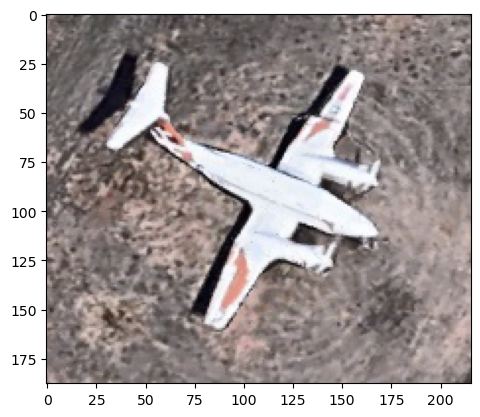

In [4]:
plt.imshow(img)
plt.show()

# 3- Fit the Dataset to Model

In [5]:
trainData = ImageDataGenerator().flow_from_directory(trainFilesPath, target_size = (224, 224))
testData = ImageDataGenerator().flow_from_directory(testFilesPath, target_size = (224, 224))

Found 3220 images belonging to 10 classes.
Found 1685 images belonging to 10 classes.


In [6]:
number_of_aircraft_types = 10

# 4- Building the Model

In [7]:
modelVGG = VGG16()

In [8]:
modelVGGLayers = modelVGG.layers
print(modelVGGLayers)

[<keras.engine.input_layer.InputLayer object at 0x000001BCCF7F45E0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000001BCCF7F4EB0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000001BCCF8FD040>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000001BCCF8FDA60>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000001BCCF8FD2E0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000001BCCF98C340>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000001BCD0973E20>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000001BCD09731C0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000001BCD0978A00>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000001BCD0983970>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000001BCD0983D00>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000001BCD09839A0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000001BCD0991460>, <keras.layers.convolutional.conv2d

In [9]:
modelVGGLayersizeUsed = len(modelVGGLayers) - 1

In [10]:
model = Sequential()
for i in range(modelVGGLayersizeUsed):
    model.add(modelVGGLayers[i])

In [11]:
for layers in model.layers:
    layers.trainable = False

In [12]:
model.add(Dense(number_of_aircraft_types, activation = 'softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [13]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [14]:
batch_size = 4

model.fit(trainData, steps_per_epoch = 400 // batch_size, epochs = 5, validation_data = testData, validation_steps = 200//batch_size)

Epoch 1/5
100/100 [==============================] - 634s 6s/step - loss: 1.0790 - accuracy: 0.6775 - val_loss: 0.7066 - val_accuracy: 0.7700
Epoch 2/5
100/100 [==============================] - 624s 6s/step - loss: 0.3842 - accuracy: 0.8636 - val_loss: 0.5206 - val_accuracy: 0.8163
Epoch 3/5
100/100 [==============================] - 581s 6s/step - loss: 0.2208 - accuracy: 0.9210 - val_loss: 0.1088 - val_accuracy: 0.9619
Epoch 4/5
100/100 [==============================] - 562s 6s/step - loss: 0.1493 - accuracy: 0.9495 - val_loss: 0.1496 - val_accuracy: 0.9463
Epoch 5/5
100/100 [==============================] - 561s 6s/step - loss: 0.1077 - accuracy: 0.9636 - val_loss: 0.0869 - val_accuracy: 0.9700


# 5- Look at the Data

In [15]:
img = Image.open('f22.jpg').resize((224, 224))

In [16]:
img = np.array(img)

In [17]:
img.shape

(224, 224, 3)

In [18]:
print(img.ndim)

3


In [19]:
img = img.reshape(-1, 224, 224, 3)

In [20]:
print(img.shape)
print(img.ndim)

(1, 224, 224, 3)
4


In [21]:
img  = preprocess_input(img)

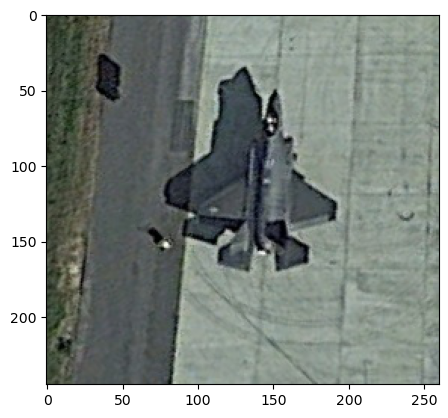

In [22]:
img_for_display = load_img('f22.jpg')
plt.imshow(img_for_display)
plt.show()

# 6- Prediction Time

In [23]:
predictions = model.predict(img)

1/1 [==============================] - 0s 302ms/step


In [24]:
predictions

array([[6.0009217e-04, 1.8168115e-06, 9.9865639e-01, 1.3306835e-07,
        1.3615058e-09, 1.7163512e-09, 6.5022829e-04, 5.1489653e-08,
        9.1108894e-05, 3.5189931e-08]], dtype=float32)

In [25]:
image_classes = ['C-21', 'U-2', 'F-22', 'A-10', 'A-26', 'P-63', 'F-16', 'T-6', 'B-29', 'T-43']
result = np.argmax(predictions[0])
print(image_classes[result])

F-22


# 7- Save the Model

In [26]:
model.save('recognitionAircraftModel.h5')

In [27]:
callbackModel = load_model('recognitionAircraftModel.h5')

In [28]:
callbackPredictions = callbackModel.predict(img)

1/1 [==============================] - 0s 279ms/step


In [29]:
callbackPredictions

array([[6.0009217e-04, 1.8168115e-06, 9.9865639e-01, 1.3306835e-07,
        1.3615058e-09, 1.7163512e-09, 6.5022829e-04, 5.1489653e-08,
        9.1108894e-05, 3.5189931e-08]], dtype=float32)

In [30]:
callbackResults = np.argmax(callbackPredictions[0])
print(image_classes[callbackResults])

F-22
